In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
     

In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
df.head()
     

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)
     

StandardScaler()

In [11]:
scaled_data = scaler.transform(df)

In [12]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=7)
pca.fit(scaled_data)

PCA(n_components=7)

In [27]:
x_pca = pca.transform(scaled_data)

In [28]:
scaled_data.shape

(569, 30)

In [29]:
x_pca.shape

(569, 4)

Text(0, 0.5, 'Second Principal Component')

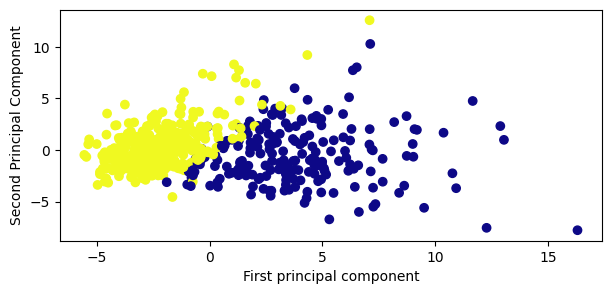

In [30]:
plt.figure(figsize=(7,3))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [33]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-